<a href="https://colab.research.google.com/github/willvw/DataSci101/blob/main/Copy_of_hw04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4


The American Community Survey (ACS) is a large survey of households
and individuals in the United States, carried out by the US
government on a continuous basis (around 3.5 million people are
contacted per year).  It is arguably the most authoritative source
of information about the demographic composition of the US
population, and is used for many purposes in academic research,
government, public policy, and in private industry.

Some of the questions in the ACS are about sensitive topics, and therefore are only released in aggregate form. The "public use microsample" (PUMS) is a set of individual ACS responses that only includes information that has been deemed safe for public release at the individual level. Here we will work with a subset of the ACS/PUMS data.

You will need to refer to the documentation to know what the ACS variable names mean: **[ACS PUMS Codebooks](https://www.census.gov/programs-surveys/acs/microdata/documentation/2018.html)** Scroll down for data dictionary 2018 "1-year" ACS/PUMS, available in several formats. If the 2018 data dictionary is unavailable, you can consult the 2014-2018 data dictionary.

For this course, we are providing a simplified version of the ACS/PUMS data from 2018. It contains a random subset of the cases and a selected subset of variables.

Note that many PUMS variables are described as being "household" or "individual" variables. These refer to characteristics of households (one or more people living at the same address) or to characteristics of individual people, respectively.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
acs = pd.read_csv("https://github.com/UM-Data-Science-101/homework-04/raw/refs/heads/main/pums_short.csv.gz")

## Question 1

### Q 1.a

Display the number of rows and columns in the `acs` DataFrame as well as the column names.

In [4]:
#solution
#get number
rows, columns = acs.shape

#display number
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

#display column names
print("\nColumn names:")
print(acs.columns.tolist())

Number of rows: 276632
Number of columns: 31

Column names:
['DIVISION', 'PUMA', 'REGION', 'ST', 'NP', 'MRGP', 'RNTP', 'TEN', 'VALP', 'VEH', 'YBL', 'FES', 'FINCP', 'FPARC', 'HHT', 'HINCP', 'HUPAC', 'MV', 'NOC', 'NPF', 'NR', 'NRC', 'PARTNER', 'R18', 'R60', 'R65', 'TAXAMT', 'WIF', 'WKEXREL', 'WORKSTAT', 'FFINCP']


### Q 1.b

Using the codebook, investigate the `"R65"` column.

* What information is contained in this column?
* What kind of data is this (nominal, ordinal, or quantitative)?
* Produce a plot that shows the distribution of `"R65"` or its key features.
* Interpret the plot: what would you say is a typical value for `"VALP"`?
* Compute the cumulative proportions of this variable.
* What proportion of households have either 0 or 1 person aged 65 or older?

Solution: The information in the column is the presence of persons 65 years and over in a household. The data in this column is ordinal, as data are grouped into groups b, 0, 1, or 2, correlating with N/A, no one 65 or older, 1 person 65 or older, and 2 people 65 or over, respectively.

I would say a typical value for "R65" is 0, as it has the highest frequency of values by a lot.

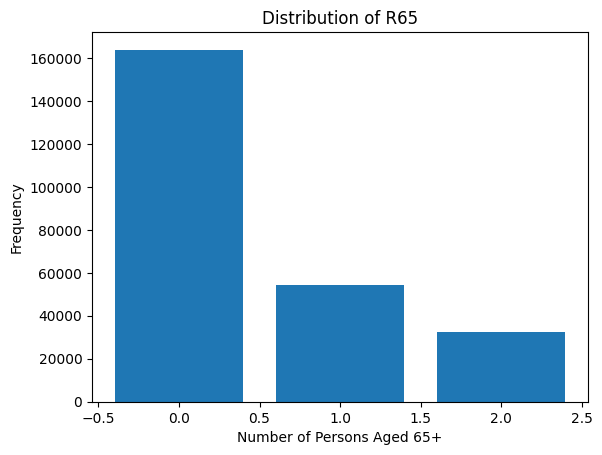

Cumulative Proportions:
R65
0.0    0.407715
1.0    0.210746
2.0    0.092589
Name: count, dtype: float64

Proportion of households with 0 or 1 person aged 65+: 0.6184606263917407


In [5]:
#solution
value_counts = acs['R65'].value_counts().sort_index()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Number of Persons Aged 65+')
plt.ylabel('Frequency')
plt.title('Distribution of R65')
plt.show()

#proportions solution
value_counts = acs['R65'].value_counts()

# Calculate proportions
proportions = value_counts / len(acs)

# Sort the proportions by index
proportions_sorted = proportions.sort_index()

# Compute cumulative proportions
cumulative_proportions = 1-(proportions_sorted.cumsum())

# Display cumulative proportions
print("Cumulative Proportions:")
print(cumulative_proportions)

# Calculate proportion of households with 0 or 1 person aged 65+
proportion_0_or_1 = cumulative_proportions[1] + cumulative_proportions[0]
print(f"\nProportion of households with 0 or 1 person aged 65+: {proportion_0_or_1}")

### Q 1.c

Using the codebook, investigate the `"VALP"` column.

* What information is contained in this column?
* What kind of data is this (nominal, ordinal, or quantitative)?
* Produce a plot that shows the distribution of `"VALP"` or its key features.
* Interpret the plot: what would you say is a typical value for `"VALP"`?
* Using numerical summaries, compute the proportion of households that have less than 50,000 in property value, less than 100,000 in property value, and less than 200,000 in property value.
* Compute the 0.1, 0.5, and 0.75 quantiles of `"VALP"`.

Solution: The "VALP" variable contains the estimated property value of owner-occupied housing units, reported in U.S. dollars, only for "for sale homes" as anything else returns a value of bbbbbbb. This is a quantitative variable as it measures the cost of homes.

I would say a typical value for "VALP" is $200k based on the plot data.

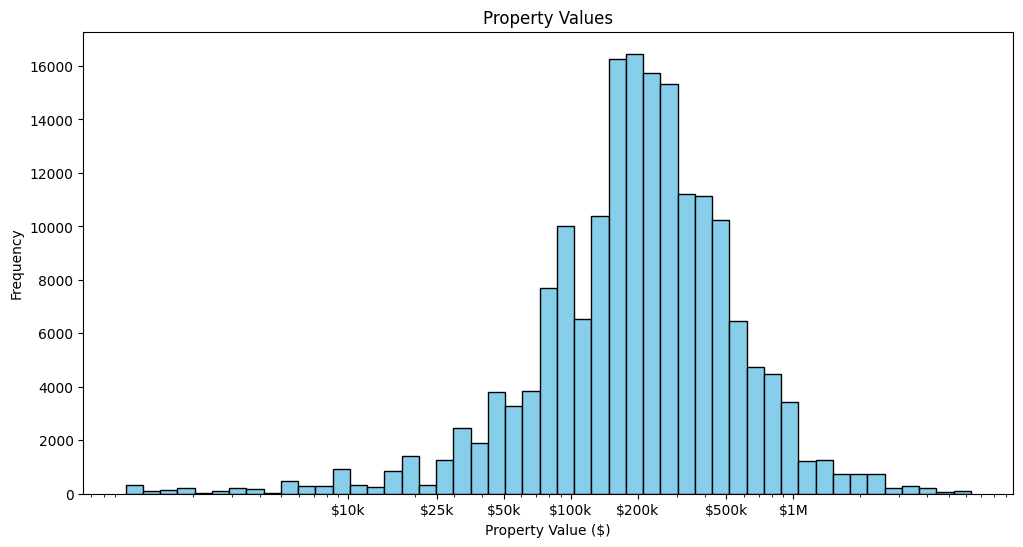

Proportion with property value < $50,000: 0.0751
Proportion with property value < $100,000: 0.1993
Proportion with property value < $200,000: 0.4547
Quantiles:
0.10     60000.0
0.50    210000.0
0.75    375000.0
Name: VALP, dtype: float64


In [6]:
#solution
valp_filtered = acs['VALP'][acs['VALP'] > 0]
bins = np.logspace(np.log10(valp_filtered.min()), np.log10(valp_filtered.max()), 50)
plt.figure(figsize=(12, 6))
plt.hist(valp_filtered, bins=bins, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title('Property Values')
plt.xlabel('Property Value ($)')
plt.ylabel('Frequency')

plt.xticks([10000, 25000, 50000, 100000, 200000, 500000, 1000000],
           ['$10k', '$25k', '$50k', '$100k', '$200k', '$500k', '$1M'])
plt.show()

valp_filtered = acs['VALP'][acs['VALP'] > 0]

#solution 2
valp_filtered = acs['VALP'][acs['VALP'] > 0]  # Exclude zero or negative values if they represent missing data

# Calculate proportions for specified thresholds
less_than_50k = (valp_filtered < 50000).mean()
less_than_100k = (valp_filtered < 100000).mean()
less_than_200k = (valp_filtered < 200000).mean()

# Display results
print(f"Proportion with property value < $50,000: {less_than_50k:.4f}")
print(f"Proportion with property value < $100,000: {less_than_100k:.4f}")
print(f"Proportion with property value < $200,000: {less_than_200k:.4f}")

#quantiles solution
quantiles = valp_filtered.quantile([0.1, 0.5, 0.75])

# Display quantiles
print("Quantiles:")
print(quantiles)

### Q 1.d

Using the codebook, investigate the `"REGION"` column.

* What information is contained in this column?
* What kind of data is this (nominal, ordinal, or quantitative)?
* Using the `replace` method for Series objects, replace the numbers in the `"REGION"` column with the names of the regions. Call this new column `"REGION_name"`.
* Produce a plot that shows the distribution of `"REGION_name"` or its key features.
* Calculate the distribution of the `"REGION_name"` column and print out the results. What proportion of households are in the Northeast and the South combined?

Solution: This column contains information about the region that households are in. It separates into 4 regions with another possible result being Puerto Rico. This data is nominal, as there is no natural order between regions. (i.e. South, Midwest, Northeast, etc.)

   REGION REGION_name
0       3       South
1       3       South
2       3       South
3       3       South
4       3       South


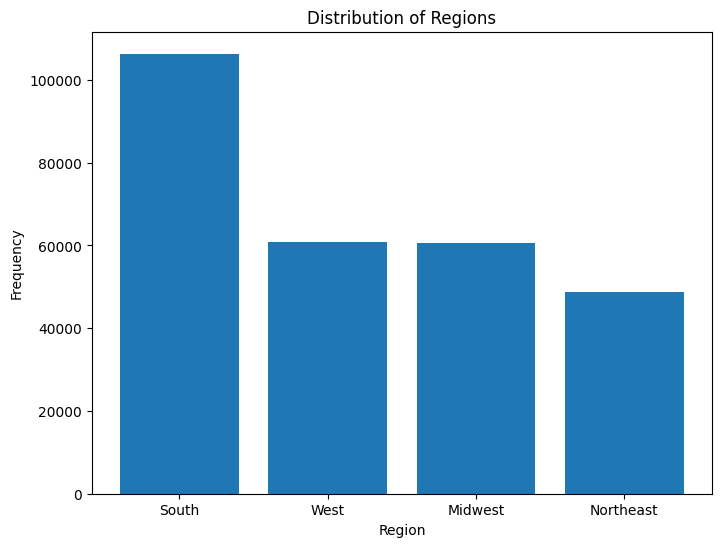

Distribution of REGION_name:
REGION_name
South        0.384388
West         0.219866
Midwest      0.219143
Northeast    0.176603
Name: proportion, dtype: float64

Proportion of households in the Northeast and the South combined: 0.5609907747476792


In [7]:
#solution
region_map = {
    1: "Northeast",
    2: "Midwest",
    3: "South",
    4: "West",
    9: "Puerto Rico"
}
acs['REGION_name'] = acs['REGION'].replace(region_map)
print(acs[['REGION', 'REGION_name']].head())

#plot
plt.figure(figsize=(8, 6))
region_counts = acs['REGION_name'].value_counts()
plt.bar(region_counts.index, region_counts.values)
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Distribution of Regions')
plt.show()

#proportion
region_distribution = acs['REGION_name'].value_counts(normalize=True)
print("Distribution of REGION_name:")
print(region_distribution)

#northeast south combined
northeast_south = region_distribution['Northeast'] + region_distribution['South']
print(f"\nProportion of households in the Northeast and the South combined: {northeast_south}")

## Question 2

### Q 2.a

Review the `"ST"` column in the code book. We can see that the values for `"ST"` are numbers in the data set. Should we consider these to be *nominal* data? Why or why not?

Yes. These numbers represent States of the U.S., which have no natural order, aligning with the definition of nominal data.

### Q 2.b

Below are two lists with the state codes and the state names listed in the code book for "ST".

Use these with the `replace` method for Series objects to get a new version of the `"ST"` column with nicer, easier to read names. Call this new column `"ST_name"`. Demonstrate your results by printing out the state name of the row at position 101206 in the table.

In [8]:
st_nums = [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 72]
st_names = "Alabama/AL,Alaska/AK,Arizona/AZ,Arkansas/AR,California/CA,Colorado/CO,Connecticut/CT,Delaware/DE,District of Columbia/DC,Florida/FL,Georgia/GA,Hawaii/HI,Idaho/ID,Illinois/IL,Indiana/IN,Iowa/IA,Kansas/KS,Kentucky/KY,Louisiana/LA,Maine/ME,Maryland/MD,Massachusetts/MA,Michigan/MI,Minnesota/MN,Mississippi/MS,Missouri/MO,Montana/MT,Nebraska/NE,Nevada/NV,New Hampshire/NH,New Jersey/NJ,New Mexico/NM,New York/NY,North Carolina/NC,North Dakota/ND,Ohio/OH,Oklahoma/OK,Oregon/OR,Pennsylvania/PA,Rhode Island/RI,South Carolina/SC,South Dakota/SD,Tennessee/TN,Texas/TX,Utah/UT,Vermont/VT,Virginia/VA,Washington/WA,West Virginia/WV,Wisconsin/WI,Wyoming/WY,Puerto Rico/PRa".split(",")

In [9]:
#solution
st_map = dict(zip(st_nums, [name.split("/")[0] for name in st_names]))
acs['ST_name'] = acs['ST'].replace(st_map)
print(acs.loc[101206, 'ST_name'])

Iowa


### Q 2.c

Review the codebook for the `PUMA` column. The description notes that we need to "use with ST for unique code." In other words, the same PUMA code may appear in multiple states, so knowing just the PUMA code is not sufficient to know where a household lives.

Verify this result by using `groupby()` to create a table that contains the number of households in each "ST_name" and "PUMA" combination using the `.size()` method (hint: the `.groupby()` method can accept a list of column names as input). Use the `.reset_index()` method on this result to make it a little easier to work with. Call this table `ST_PUMA`.

Show that PUMA number 100 appears in multiple states.

In [10]:
#solution
ST_PUMA = acs.groupby(['ST_name', 'PUMA']).size().reset_index(name='household_count')

puma_100 = ST_PUMA[ST_PUMA['PUMA'] == 100]
print("PUMA 100 appears in the following states:")
print(puma_100)

PUMA 100 appears in the following states:
             ST_name  PUMA  household_count
0            Alabama   100              160
39           Arizona   100               97
93          Arkansas   100              203
378         Colorado   100              221
420      Connecticut   100              139
608          Georgia   100              139
680           Hawaii   100              202
690            Idaho   100              179
842             Iowa   100              149
864           Kansas   100              166
886         Kentucky   100              191
920        Louisiana   100              131
954            Maine   100              219
964         Maryland   100              121
1008   Massachusetts   100              209
1060        Michigan   100              313
1128       Minnesota   100              250
1171     Mississippi   100              130
1192        Missouri   100              248
1239         Montana   100               97
1246        Nebraska   100        

### Q 2.d

For each state, find the size (in terms of households) of the largest PUMA in that state.


In [13]:
#solution
max_households_by_state = ST_PUMA.groupby('ST_name')['household_count'].max()
print("Size of the largest PUMA in each state:")
print(max_households_by_state)

Size of the largest PUMA in each state:
ST_name
Alabama                 457
Alaska                  247
Arizona                 353
Arkansas                203
California              354
Colorado                221
Connecticut             223
Delaware                343
District of Columbia    170
Florida                 358
Georgia                 233
Hawaii                  202
Idaho                   180
Illinois                291
Indiana                 183
Iowa                    202
Kansas                  210
Kentucky                197
Louisiana               273
Maine                   298
Maryland                232
Massachusetts           209
Michigan                351
Minnesota               305
Mississippi             193
Missouri                248
Montana                 221
Nebraska                221
Nevada                  196
New Hampshire           226
New Jersey              250
New Mexico              236
New York                316
North Carolina          262


### Q 2.e

For each `ST_name` and `PUMA` combination, add up the total income of all households. Use `.reset_index(name = "total_income")` to make the table a little easier to work with.

Graph the distribution of total income per ST_state-PUMA combination. Using the graph, answer the following questions:

* What is a typical value for these total incomes?
* Where do most of the observations falls?
* Do you see about equal variation across the range of the `total_income` values.

(Note: there is a good chance the graph axes will be in "scientific notation." A value like 3e7 means $3 \times 10^7$.)


A typical value for total incomes would be 9.5 Million, with 50 percent of the total observations falling between approximately 6 Million and 11.5 Million.

The distribution is right-skewed, meaning there are many low-to-moderate income combos but only a couple with very high total incomes.This skewness implies unequal variation across the range of total income values. Most observations will fall within a tighter range, (as shown by IQR), but outliers will stretch the distribution.

      ST_name  PUMA  total_income
2346  Wyoming   100     9866650.0
2347  Wyoming   200     6901870.0
2348  Wyoming   300     7315490.0
2349  Wyoming   400    10681280.0
2350  Wyoming   500     8653204.0


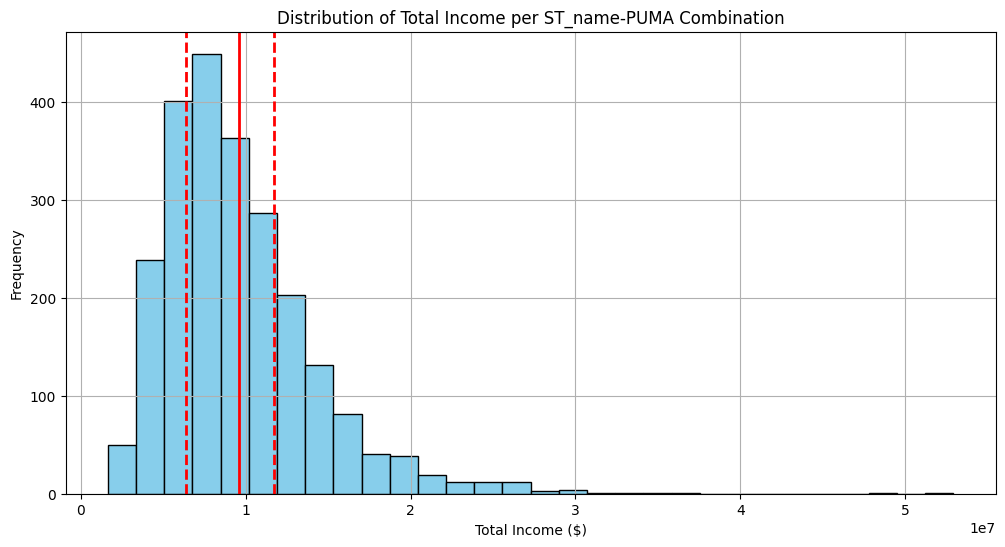

The mean total income is: $9572065.21
            Dashed Lines = 25th and 75th Percentiles             Solid Line = Mean


In [31]:
#solution
ST_PUMA_income = acs.groupby(['ST_name', 'PUMA'])['HINCP'].sum().reset_index(name='total_income')
print(ST_PUMA_income.tail())

mean_total_income = ST_PUMA_income['total_income'].mean()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(ST_PUMA_income['total_income'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Income per ST_name-PUMA Combination')
plt.axvline(mean_total_income, color='red', linestyle='solid', linewidth=2, label='Mean')
q1, q3 = np.percentile(ST_PUMA_income['total_income'], [25, 75])
plt.axvline(q1, color='red', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(q3, color='red', linestyle='dashed', linewidth=2, label='75th Percentile')
plt.xlabel('Total Income ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print(f"The mean total income is: ${mean_total_income:.2f}")
print("            Dashed Lines = 25th and 75th Percentiles             Solid Line = Mean")